''' Problem Statement:
    a) Apply Data pre-processing (Label Encoding, Data Transformation ... )
       techniques if necessary.
    b) Perform data-preparation (Train-Test Split)
    c) Apply Machine Learning Algorithm
    d) Evaluate Model.
    e) Apply Cross-Validation and Evaluate Model'''

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df = df.set_index('target')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Labels
target,,,,,,,,,,,,,,
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,3
0,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
0,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
0,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
0,62,0,0,138,294,1,1,106,0,1.9,1,3,2,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.iloc[:,:4]
Y=df.index

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.75,random_state=123)
y_train.shape

(768,)

In [ ]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [ ]:
cluster =  []
for k in range (1,11):
  kmean = KMeans(n_clusters=k).fit(df)
  cluster.append(kmean.inertia_)


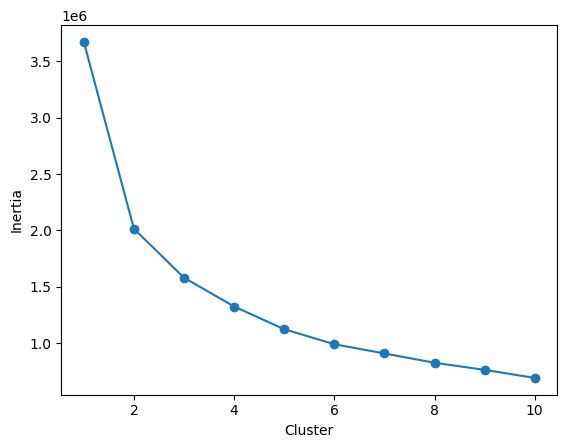

In [ ]:
plt.plot(range(1,11),cluster,marker='o')
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.show()

In [ ]:
km = KMeans(n_clusters=5).fit(df)
df['Labels'] = km.labels_
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Labels
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2


In [ ]:
centers = np.array(km.cluster_centers_)

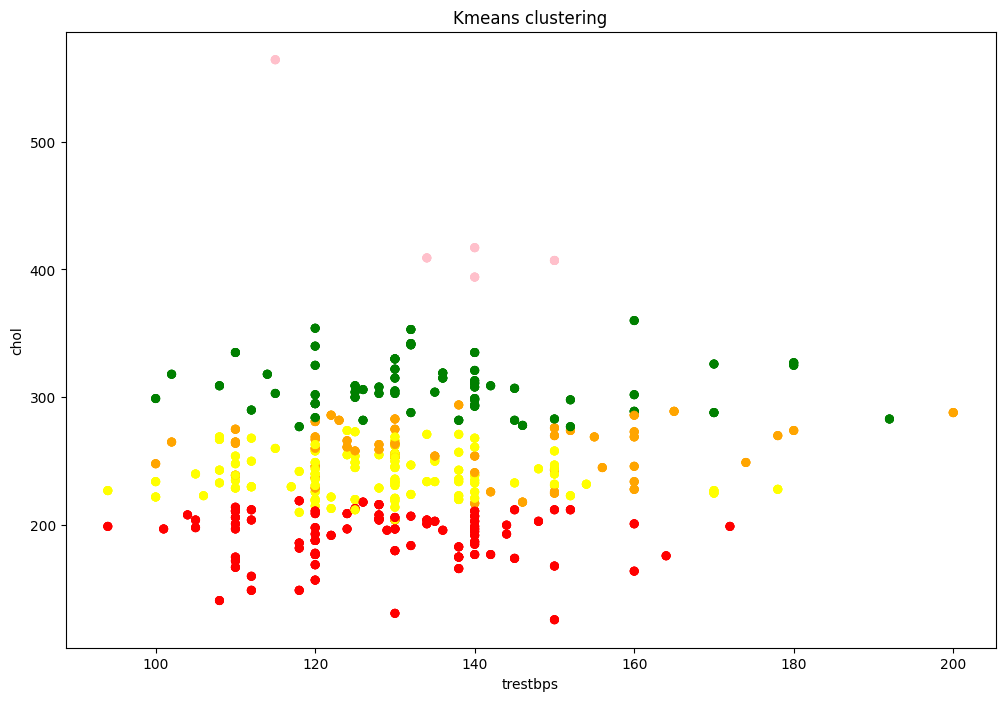

In [ ]:
# Plotting Clusters
colors = {0: 'red', 1: 'green', 2: 'orange', 3: 'yellow', 4: 'pink'}

plt.figure(figsize=(12, 8))
plt.scatter(df['trestbps'], df['chol'], linewidths=0.5, color=df['Labels'].map(colors))
plt.title('Kmeans clustering')
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.show()

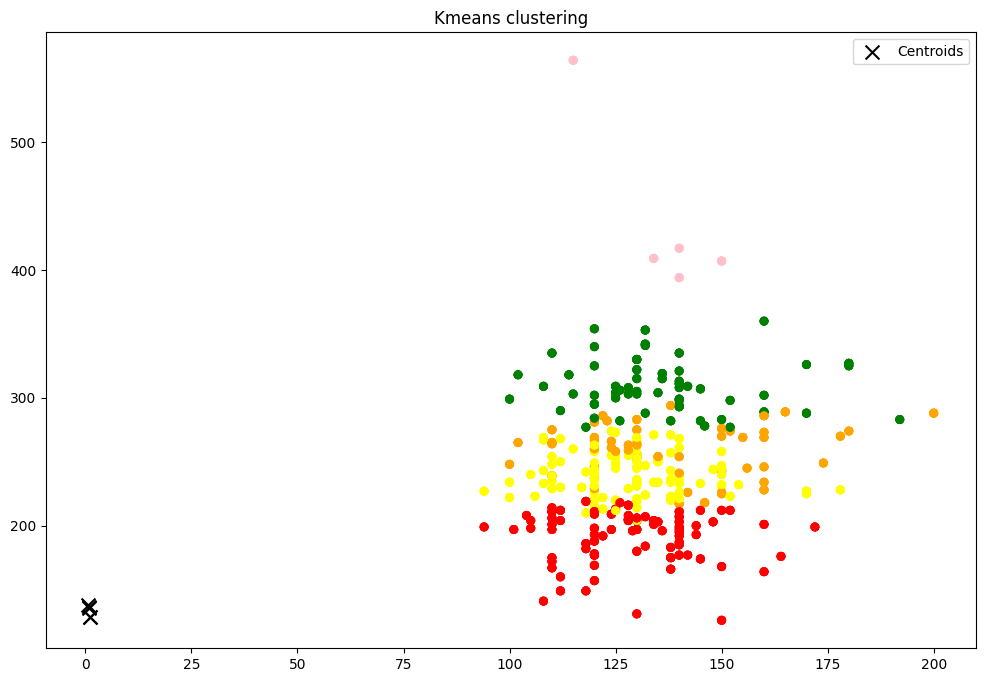

In [ ]:
# Plotting Cetroids for clusters
colors = {0: 'red', 1: 'green', 2: 'orange', 3: 'yellow', 4: 'pink'}

plt.figure(figsize=(12, 8))
plt.scatter(df['trestbps'], df['chol'], linewidths=0.5, color=df['Labels'].map(colors))
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], s=100, c='black', label='Centroids', marker='x')
plt.title("Kmeans clustering")
plt.legend()
plt.show()